## imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Constants

In [2]:
SURVIVAL_LABEL = ["Survived", "Deceased"]

PASSENGERID = "PassengerId"
SURVIVED    = "Survived"
PCLASS      = "Pclass"
NAME        = "Name"
SEX         = "Sex"
AGE         = "Age"
SIBSP       = "SibSp"
PARCH       = "Parch"
TICKET      = "Ticket"
FARE        = "Fare"
CABIN       = "Cabin"
EMBARKED    = "Embarked"

AGE_RANGE       = "Age_Range"
GENDER_AGE_CAT  = "Gender_Age_Cat"
IS_ALONE        = "Is_Alone"
AGE_PREDICT     = "Age_Predict"

FEATURES_1          = [SURVIVED ,PCLASS ,SEX ,AGE ,SIBSP ,PARCH ,FARE ,EMBARKED]
FEATURES_2          = [GENDER_AGE_CAT, IS_ALONE, AGE_PREDICT]
FEATURES_USELESS    = [PASSENGERID, TICKET, CABIN]

# Datasets

### Data Importing

In [3]:
test_data_path = "data/test.csv"
train_data_path = "data/train.csv"
submission_data_path = "data/gender_submission.csv"

In [4]:
df_train = pd.read_csv(train_data_path)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test = pd.read_csv(test_data_path)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
datasets = [df_train, df_test]

In [7]:
df_full = pd.concat(datasets).reset_index(drop=True)

m = df_full.shape[0]
m_test  = df_test.shape[0]
m_train = df_train.shape[0]
print(m, m_train, m_test)
df_full

1309 891 418


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
def train_test_devide(df_: pd.DataFrame) -> tuple[pd.DataFrame]:
    df_train = df_[(df_full.Survived.notna())]
    df_test = df_[(df_full.Survived.isna())]
    return df_train, df_test



In [9]:
df_full.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [10]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### New Data Features

In [11]:
df_full[IS_ALONE] = ((df_full.Parch + df_full.SibSp) == 0).astype(int)

df_full[IS_ALONE].value_counts()

1    790
0    519
Name: Is_Alone, dtype: int64

### Predicting Using Weak Model

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

_d_ = df_train[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked", "SibSp", "Parch"]].copy()
_d_ = _d_.dropna()

_encoder_ = LabelEncoder()
_d_.iloc[:, 2] = _encoder_.fit_transform(_d_.iloc[:, 2].values)
_d_.iloc[:, 5] = _encoder_.fit_transform(_d_.iloc[:, 5].values)

_s_scaler_ = StandardScaler()
_d_[["Age", "Fare"]] = _s_scaler_.fit_transform(_d_[["Age", "Fare"]])

_x_ = _d_.iloc[:, 1:].values
_y_ = _d_.Survived.values

_weak_model_ = LogisticRegression().fit(_x_, _y_)

_coef_ = _weak_model_.coef_.round(4).tolist()

sorted(
    list(zip(_d_.columns[1:], _coef_[0][1:]))
    , key=lambda tup: abs(tup[1]), reverse=True)

[('Pclass', -2.4859),
 ('Sex', -0.604),
 ('Embarked', -0.3423),
 ('Fare', -0.1739),
 ('Age', 0.0885),
 ('SibSp', -0.0459)]

Here It can be been that which labels had big role so lets focus on them first...

### Dataset Visualization

In [13]:
# Setting up visualisations
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(10,6), 
    'axes.facecolor': '#eee',
    'axes.grid': True,
    'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},font_scale=1)
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

#### Survival Status / Various Factors

##### Survived vs Deceased

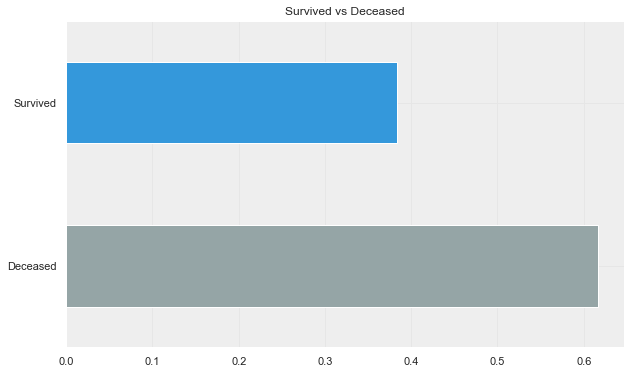

In [14]:
survival_ratio = df_full.Survived.value_counts(normalize=True)
survival_ratio.plot.barh(color=["C1", "C0"],)

plt.yticks((1, 0), labels=SURVIVAL_LABEL)
plt.title("Survived vs Deceased")
plt.show()

In [15]:
# sns.set(rc={'figure.figsize':(22,10)})

# ax = sns.countplot(y="answer", hue="sex", data=df)

# # percentage of bars
# for i in ax.patches:
#     # get_width pulls left or right; get_y pushes up or down
#     ax.text(i.get_width()+.12, i.get_y()+.3, \
#             '%' + str(round((i.get_width()/total)*100, 1)), fontsize=15,
#             color='dimgrey')
    
# ax.set_ylabel('Answers',fontsize=20)
# ax.set_xlabel('Count',fontsize=20)
# ax.tick_params(axis='x', which='major', labelsize=20)
# ax.tick_params(axis='y', which='major', labelsize=20)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,
#           prop={'size': 14})


##### Survival / Sex (Male vs Female)

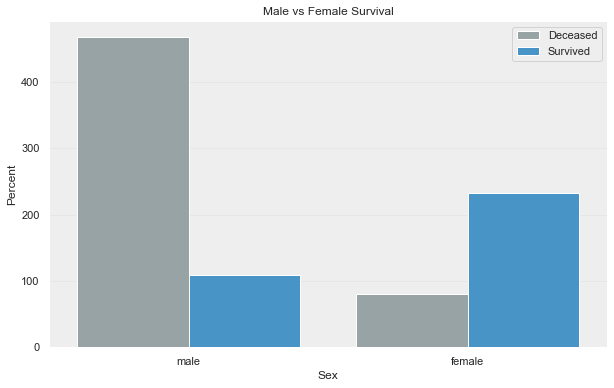

In [16]:
sex_survival_dist_chart = sns.countplot(x=SEX, hue=SURVIVED, data=df_full, palette=["C1", "C0"])
sex_survival_dist_chart.set(ylabel="Percent")

plt.title("Male vs Female Survival")
plt.legend(SURVIVAL_LABEL[::-1])
plt.show()

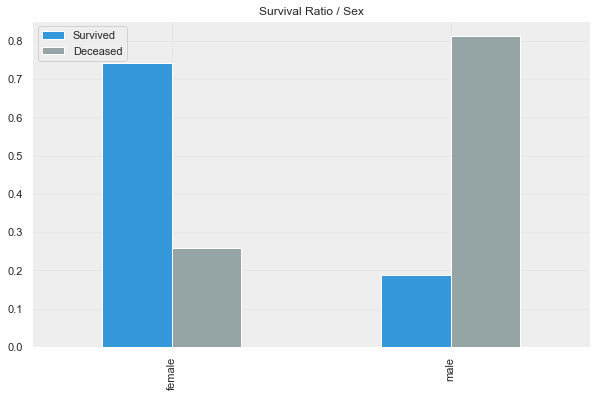

In [17]:
sex_survived_dist    = df_full[df_full.Survived==1].Sex.value_counts().sort_index()
sex_deceased_dist    = df_full[df_full.Survived==0].Sex.value_counts().sort_index()
sex_survival_dist    = pd.DataFrame([sex_survived_dist, sex_deceased_dist], index=SURVIVAL_LABEL).T
sex_survival_ratio   = sex_survival_dist.apply(lambda x: x/x.sum(), axis=1)

sex_survival_ratio.plot.bar()
plt.title("Survival Ratio / Sex")
plt.show()

Here we can see that Sex Really affected the Chance of Survival.<br>
The Bars are almost inverse of each other.

* Female - Lucky
* Male - Unlucky

##### Survival / Pclass Difference

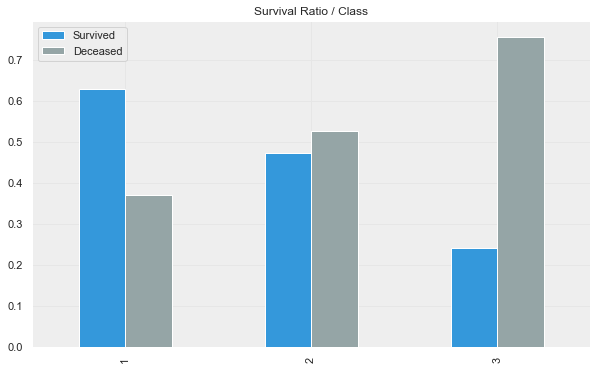

In [18]:
pclass_survived_dist    = df_full[df_full.Survived==1].Pclass.value_counts().sort_index()
pclass_deceased_dist    = df_full[df_full.Survived==0].Pclass.value_counts().sort_index()
pclass_survival_dist    = pd.DataFrame([pclass_survived_dist, pclass_deceased_dist], index=SURVIVAL_LABEL).T
pclass_survival_ratio   = pclass_survival_dist.apply(lambda x: x/x.sum(), axis=1)

pclass_survival_ratio.plot.bar()
plt.title("Survival Ratio / Class")
plt.show()

Here we can see that People with **higher Pclass** had more chance of survival than the people with **Lower Pclass** .<br>
Luck-> 1>2>3

* Pclass 1 - >60% Survival Change
* Pclass 2 - <50% Survival Change
* Pclass 3 - =25% Survival Change

##### Survival / Age Group

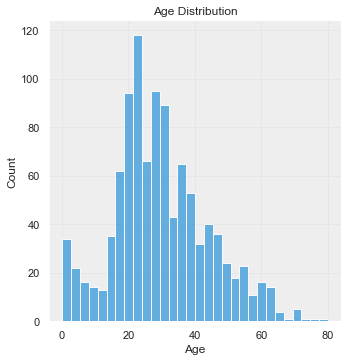

In [19]:
sns.displot(df_full.Age, bins=30)
plt.title("Age Distribution")
plt.show()

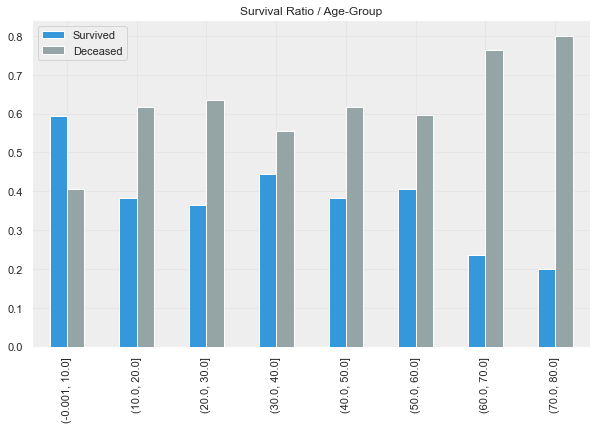

In [20]:
age_bins = np.arange(0, 81, 10)
Age_Range_df = pd.cut(df_full.Age, bins=age_bins, include_lowest=True)

age_grp_survived_dist    = Age_Range_df[df_full.Survived==1].value_counts().sort_index()
age_grp_deceased_dist    = Age_Range_df[df_full.Survived==0].value_counts().sort_index()
age_grp_survival_dist    = pd.DataFrame([age_grp_survived_dist, age_grp_deceased_dist], index=SURVIVAL_LABEL).T
age_grp_survival_ratio   = age_grp_survival_dist.apply(lambda x: x/x.sum(), axis=1)

age_grp_survival_ratio.plot.bar()
plt.title("Survival Ratio / Age-Group")
plt.show()

Here we can see that the Chance of Survival is different in different Age-Groups.<br>
The Bars are mixed, but we can see that - 
* 0-10 yrs agr group has the Highest chance of survival.
* 70-80 yrs agr group has the Lowest chance of survival.
* The Chance of Survial Varies from 60% - 20% depending upon the Age Group...

Thus The Age of the Passenger is important.

##### Survival / Sibbling & Spouse Number 

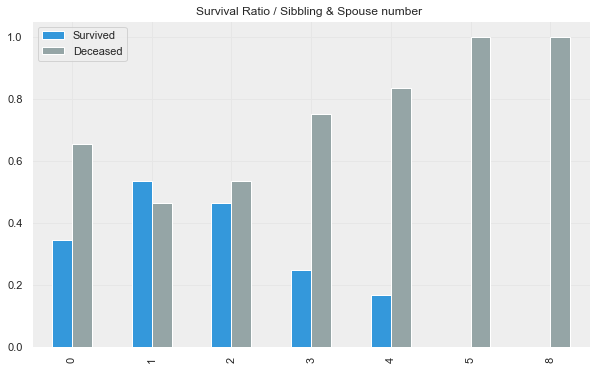

In [21]:
sibsp_survived_dist    = df_full[df_full.Survived==1].SibSp.value_counts().sort_index()
sibsp_deceased_dist    = df_full[df_full.Survived==0].SibSp.value_counts().sort_index()
sibsp_survival_dist    = pd.DataFrame([sibsp_survived_dist, sibsp_deceased_dist], index=SURVIVAL_LABEL).T
sibsp_survival_ratio   = sibsp_survival_dist.apply(lambda x: x/x.sum(), axis=1)

sibsp_survival_ratio.plot.bar()
plt.title("Survival Ratio / Sibbling & Spouse number ")
plt.show()

Here we can see that the Chance of Survival is increased if the passengers is traveling with 1-2 of their Sibling/Spouse then redused after that.<br>

The Bars follow - 
* mid-up-mid-down pattern is followed.
* Having >2 Sibling/Spouse slump the Chance of Survival.
* The Chance of Survial is best with 1-2 Sibling/Spouse.


##### Survival / Parents & Children Number 

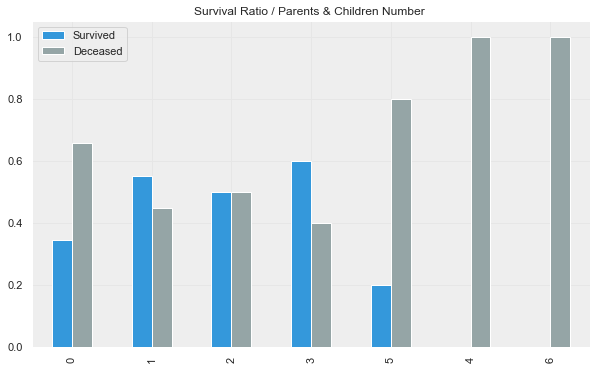

In [22]:
parch_survived_dist    = df_full[df_full.Survived==1].Parch.value_counts().sort_index()
parch_deceased_dist    = df_full[df_full.Survived==0].Parch.value_counts().sort_index()
parch_survival_dist    = pd.DataFrame([parch_survived_dist, parch_deceased_dist], index=SURVIVAL_LABEL).T
parch_survival_ratio   = parch_survival_dist.apply(lambda x: x/x.sum(), axis=1)

parch_survival_ratio.plot.bar()
plt.title("Survival Ratio / Parents & Children Number ")
plt.show()

Similar to SibSp, here we can see that the Chance of Survival is increased if the passengers is traveling with 1-3 of their Parents/Children then redused after that.<br>

The Bars follow - 
* Pattern similar to SibSp
* Having >3 Parents/Children slump the Chance of Survival.
* The Chance of Survial is best with 1-3 Parents/Children.


##### Survival / Family Members Number 

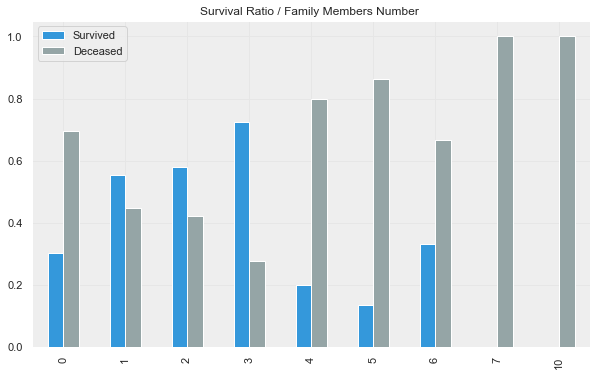

In [23]:
fam_num_df = df_full.Parch + df_full.SibSp

fam_num_survived_dist    = fam_num_df[df_full.Survived==1].value_counts().sort_index()
fam_num_deceased_dist    = fam_num_df[df_full.Survived==0].value_counts().sort_index()
fam_num_survival_dist    = pd.DataFrame([fam_num_survived_dist, fam_num_deceased_dist], index=SURVIVAL_LABEL).T
fam_num_survival_ratio   = fam_num_survival_dist.apply(lambda x: x/x.sum(), axis=1)

fam_num_survival_ratio.plot.bar()
plt.title("Survival Ratio / Family Members Number ")
plt.show()

When we add the number of family members we get a really intresting pattern.<br>

The Bars follow - 
* Mid-Up-Down pattern, with less maximas and minimas.
* Having >3 Family Members slump the Chance of Survival.
* The Chance of Survial is best with 1-3 Family Members.

#####  Survival / Embark Point

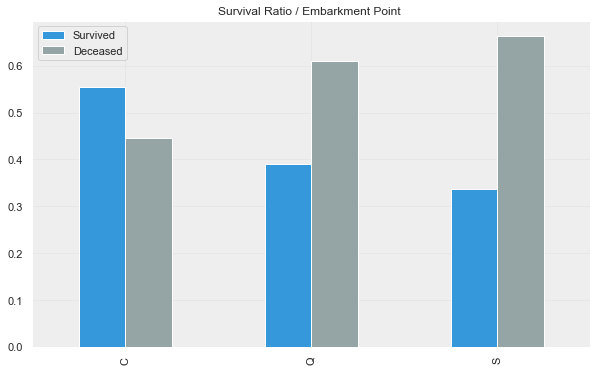

In [24]:
embark_survived_dist    = df_full[df_full.Survived==1].Embarked.value_counts().sort_index()
embark_deceased_dist    = df_full[df_full.Survived==0].Embarked.value_counts().sort_index()
embark_survival_dist    = pd.DataFrame([embark_survived_dist, embark_deceased_dist], index=SURVIVAL_LABEL).T
embark_survival_ratio   = embark_survival_dist.apply(lambda x: x/x.sum(), axis=1)

embark_survival_ratio.plot.bar()
plt.title("Survival Ratio / Embarkment Point ")
plt.show()

Vaguely Speaking, The Embarkment Point dosen't seem to be a big reason for variation in survival rate. But Visually it says a different story.
<br>

People who embarked from C, have Higher Chance of survival Than those who Embarked from Other Places.

#####  Survival / Fare

In [25]:
df_full.Fare.describe().to_dict()

{'count': 1308.0,
 'mean': 33.2954792813456,
 'std': 51.75866823917414,
 'min': 0.0,
 '25%': 7.8958,
 '50%': 14.4542,
 '75%': 31.275,
 'max': 512.3292}

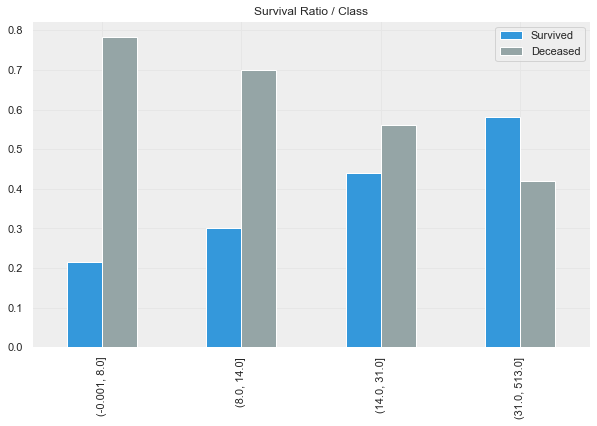

In [26]:
fare_bins = [0, 8, 14, 31, 513]
fare_Range_df = pd.cut(df_full.Fare, bins=fare_bins, include_lowest=True)

fare_grp_survived_dist    = fare_Range_df[df_full.Survived==1].value_counts().sort_index()
fare_grp_deceased_dist    = fare_Range_df[df_full.Survived==0].value_counts().sort_index()
fare_grp_survival_dist    = pd.DataFrame([fare_grp_survived_dist, fare_grp_deceased_dist], index=SURVIVAL_LABEL).T
fare_grp_survival_ratio   = fare_grp_survival_dist.apply(lambda x: x/x.sum(), axis=1)

fare_grp_survival_ratio.plot.bar()
plt.title("Survival Ratio / Class")
plt.show()

In [27]:
np.log(df_full.Fare.dropna() + 1e-1).astype(int)

0       1
1       4
2       2
3       3
4       2
       ..
1304    2
1305    4
1306    1
1307    2
1308    3
Name: Fare, Length: 1308, dtype: int64

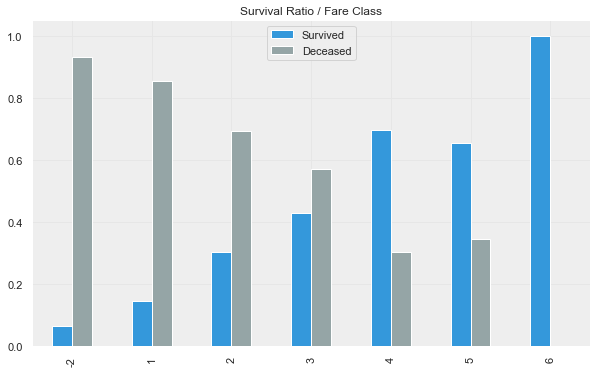

In [28]:
fare_Range_df = np.log(df_full.Fare.dropna() + 1e-1).astype(int)

fare_log_grp_survived_dist    = fare_Range_df[df_full.Survived==1].value_counts().sort_index()
fare_log_grp_deceased_dist    = fare_Range_df[df_full.Survived==0].value_counts().sort_index()
fare_log_grp_survival_dist    = pd.DataFrame([fare_log_grp_survived_dist, fare_log_grp_deceased_dist], index=SURVIVAL_LABEL).T
fare_log_grp_survival_ratio   = fare_log_grp_survival_dist.apply(lambda x: x/x.sum(), axis=1)

fare_log_grp_survival_ratio.plot.bar()
plt.title("Survival Ratio / Fare Class")
plt.show()

Fare is related to Pclass, Higher the Fare, Higher The Class.<br>
It is a Greate Feature to Use insted/along Pclass...<br><br>

It will be tested later.

## Feature Engneering

### Missing Dataset and Dealing With it.

<AxesSubplot:>

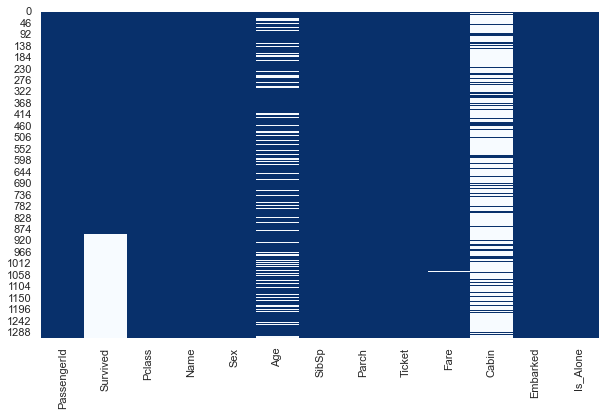

In [29]:
sns.heatmap(data=df_full.notna(), cbar=False, cmap="Blues")

The data with "White" lines represent missing data and "Blue" lines represent not-null data.<br>
We can either predict the missing data or leave the entire feature.

In [30]:
{k : i 
 for k, i in (m - df_full.notna().sum()).to_dict().items()
 if i}

{'Survived': 418, 'Age': 263, 'Fare': 1, 'Cabin': 1014, 'Embarked': 2}

Let's Now Predict the missing Values of **Embarked**, **Fare** and **Age**.

#### Embarked

In [31]:
df_full.Embarked.value_counts(normalize=1)

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

Since around 70% people Embarked from S.
lets simply take the mode.

In [32]:
df_full.Embarked = df_full.Embarked.fillna(df_full.Embarked.mode()[0])

In [33]:
df_full.Embarked.isna().sum()

0

#### Fare

In [34]:
df_full[df_full.Fare.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_Alone
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,1


We'll be choosing the mean of Fare in the group of people whose Pclass and Sex are the same.

In [35]:
grp_1 = df_full.groupby([PCLASS, SEX, IS_ALONE])
df_full.Fare = grp_1.Fare.apply(lambda fare: fare.fillna(fare.mean()))

#### Age

For Age Using only Sex and PClass may not be a good way, as this would easily skip all the children since the mean age is so high.<br>

Insted Lets Use Name. Yes, Name! to predict the age. <br>

We can use the title in the name as one of the feature to predict the age.

In [36]:
titles = df_full.Name.apply(lambda name: name.split(",")[1].split(".")[0].strip())
print(titles.unique())
titles[df_full.Age.isna()].value_counts()

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


Mr        176
Miss       50
Mrs        27
Master      8
Dr          1
Ms          1
Name: Name, dtype: int64

We Can join and use some titles as one. <br>
Though, This will increase the number of groups, at the same time this will also reduce edge case percentage.

In [37]:
male_titles     = titles[(df_full.Sex == "male")].unique()
female_titles   = titles[(df_full.Sex == "female")].unique()

unisex_titles       = [title_ for title_ in male_titles if title_ in female_titles]
male_only_titles    = [title_ for title_ in male_titles if title_ not in unisex_titles]
female_only_titles  = [title_ for title_ in female_titles if title_ not in unisex_titles]

unisex_titles, male_only_titles, female_only_titles

(['Dr'],
 ['Mr', 'Master', 'Don', 'Rev', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer'],
 ['Mrs', 'Miss', 'Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'])

We can make 5 Categories - 
* Mr,  Don,  Rev,  Major,  Sir,  Col,  Capt,  Jonkheer, [Dr]
* Mrs,  Mme,  Lady,  Mlle,  the Countess,  Dona, [Dr]
* Master
* Miss, Ms (Those Who Traveled Alone, Implying They may be olded)
* Miss, Ms (Those Who Traveled With Someone, Implying They may be younger)

In [38]:
Title_Cat_1 = ["Mr",  "Don",  "Rev",  "Major",  "Sir",  "Col",  "Capt",  "Jonkheer"]
Title_Cat_2 = ["Mrs",  "Mme",  "Lady",  "Mlle",  "the Countess",  "Dona"]
Title_Cat_3 = ["Master"]
Title_Cat_4 = ["Miss", "Ms"]


In [39]:
title_cat_num = titles.replace(Title_Cat_1, value="Adult Male")
title_cat_num = title_cat_num.replace(Title_Cat_2, "Adult Female")
title_cat_num = title_cat_num.replace(Title_Cat_3, "Young Boy")
title_cat_num = title_cat_num.replace(Title_Cat_4, "Young Female")

title_cat_num[(df_full.Sex=="male") & (title_cat_num=="Dr")]    = "Adult Male"
title_cat_num[(df_full.Sex=="female") & (title_cat_num=="Dr")]  = "Adult Female"
title_cat_num[(df_full.Is_Alone==0) & (title_cat_num=="Young Female")] = "Young Girl"

df_full[GENDER_AGE_CAT] = title_cat_num
df_full.Gender_Age_Cat.value_counts()

Adult Male      782
Adult Female    204
Young Female    152
Young Girl      110
Young Boy        61
Name: Gender_Age_Cat, dtype: int64

In [40]:
np.random.randn(200).max() / 3

0.8879215309713618

In [41]:
grp_2 = df_full.groupby([GENDER_AGE_CAT, PCLASS])
df_full[AGE_PREDICT] = grp_2.Age.apply(lambda age: age.fillna(age.mean()))

overloaded_group = df_full[(df_full.Pclass==3) & (df_full.Gender_Age_Cat=="Adult Male")].Age
overloaded_group_index =  overloaded_group[df_full.Age.isna()].index


<AxesSubplot:>

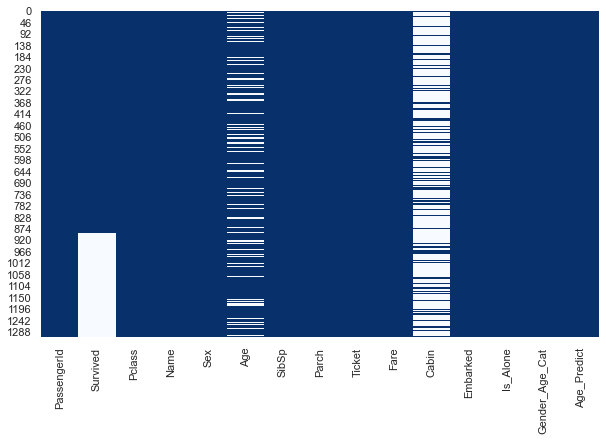

In [42]:
sns.heatmap(data=df_full.notna(), cbar=False, cmap="Blues")

In [43]:
df_full.isna().sum()

PassengerId          0
Survived           418
Pclass               0
Name                 0
Sex                  0
Age                263
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin             1014
Embarked             0
Is_Alone             0
Gender_Age_Cat       0
Age_Predict          0
dtype: int64

Now, We have Predicted the missing values, Weather we should use age, is a difficult to answer question...
We'll compare the results in later stages.

### Feature Encoding

In This Part, We'll Encode the Features... <br>

* One Hot: Multi Categorical Features
* Label Encoding: Binary Categorical Features

In [44]:
df_full.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Is_Alone',
       'Gender_Age_Cat', 'Age_Predict'],
      dtype='object')

In [45]:
df_full[[*FEATURES_1, *FEATURES_2]].nunique()

Survived            2
Pclass              3
Sex                 2
Age                98
SibSp               7
Parch               8
Fare              282
Embarked            3
Gender_Age_Cat      5
Is_Alone            2
Age_Predict       109
dtype: int64

<!-- * Binary Categorical Features - Survived, Sex, Is_Alone
* Multi Categorical Features - Pclass, Embarked, Gender_Age_Cat
* Continous Features - Age, SibSp, Parch, Fare, Age_Predict -->

|Binary Categorical Features|Multi Categorical Features|Continous Features|
|---|---|---|
|  ***Survived***, ***Sex***, ***Is_Alone***  |  ***Pclass***, ***Embarked***, ***Gender_Age_Cat***  |  ***Age***, ***SibSp***, ***Parch***, ***Fare***, ***Age_Predict***  |

In [46]:
def data_encoder(df_: pd.DataFrame):    
    df = df_.copy()
    df.Sex = (df.Sex=="male").astype(int)
    
    df["Pclass_1"] = (df.Pclass==1).astype(int)
    df["Pclass_2"] = (df.Pclass==2).astype(int)
    
    df["Embarked_From_S"] = (df.Embarked=="S").astype(int)
    df["Embarked_From_C"] = (df.Embarked=="C").astype(int)
    
    return df.drop([EMBARKED, PCLASS], axis=1)

df_full_encoded = data_encoder(df_full.drop([*FEATURES_USELESS, AGE, NAME, GENDER_AGE_CAT], axis=1))
features = df_full_encoded.columns[1:]
df_full_encoded.head(10)

,Survived,Sex,SibSp,Parch,Fare,Is_Alone,Age_Predict,Pclass_1,Pclass_2,Embarked_From_S,Embarked_From_C
0,0.0,1,1,0,7.2500,0,22.00000,0,0,1,0
1,1.0,0,1,0,71.2833,0,38.00000,1,0,0,1
2,1.0,0,0,0,7.9250,1,26.00000,0,0,1,0
3,1.0,0,1,0,53.1000,0,35.00000,1,0,1,0
4,0.0,1,0,0,8.0500,1,35.00000,0,0,1,0
5,0.0,1,0,0,8.4583,1,28.31891,0,0,0,0
6,0.0,1,0,0,51.8625,1,54.00000,1,0,1,0
7,0.0,1,3,1,21.0750,0,2.00000,0,0,1,0
8,1.0,0,0,2,11.1333,0,27.00000,0,0,1,0
9,1.0,0,1,0,30.0708,0,14.00000,0,1,0,1


We have Sucessfully Encoded the features and removed the redundent features.

## Train Dev Test devide

In [47]:
df_train, df_test = train_test_devide(df_full_encoded)

In [48]:
from sklearn.model_selection import train_test_split

def train_test_devide(df_: pd.DataFrame) -> tuple[pd.DataFrame]:
    df_train_ = df_[(df_full.Survived.notna())]
    df_test_ = df_[(df_full.Survived.isna())]
    return df_train_, df_test_

def xy_devide(df_: pd.DataFrame) -> tuple[np.ndarray]:
    X = df_.iloc[:, 1:].values
    y = df_.iloc[:, 0].values
    return X, y

def train_dev_test_devide(df_: pd.DataFrame, train_size_: float=0.8, random_state_: int=0) -> tuple[np.ndarray]:
    df_train_, df_test_ = train_test_devide(df_)
    X, y, = xy_devide(df_train_)
    X_train_, X_Dev_, y_train_, y_Dev_ = train_test_split(X, y, 
                                                      train_size=train_size_, 
                                                      random_state=random_state_)
    X_test_, y_test_ = xy_devide(df_test_)
    
    return X_train_, X_Dev_, X_test_, y_train_, y_Dev_, y_test_


X_train, X_dev, X_test, y_train, y_dev, y_test = train_dev_test_devide(df_full_encoded)

In [49]:
print(list(map(lambda x: x.shape, [df_full, df_train, df_test])))
list(map(lambda x: x.shape, [X_train, X_dev, X_test, y_train, y_dev, y_test]))

[(1309, 15), (891, 11), (418, 11)]


[(712, 10), (179, 10), (418, 10), (712,), (179,), (418,)]

## Feature Scaling

In This Part, We'll Scale the Features.

* Min-Max Scaling.
* Absolute Max Scaling.
* Normalize.
* Standardization.

In [50]:
df_full_encoded.columns[1:]

Index(['Sex', 'SibSp', 'Parch', 'Fare', 'Is_Alone', 'Age_Predict', 'Pclass_1',
       'Pclass_2', 'Embarked_From_S', 'Embarked_From_C'],
      dtype='object')

In [51]:
X_train[:5]

array([[ 0.        ,  0.        ,  2.        , 15.2458    ,  0.        ,
        32.32653061,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.        , 10.5       ,  1.        ,
        31.        ,  0.        ,  1.        ,  1.        ,  0.        ],
       [ 1.        ,  1.        ,  1.        , 37.0042    ,  0.        ,
        31.        ,  0.        ,  1.        ,  0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.        ,  4.0125    ,  1.        ,
        20.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.        ,  7.25      ,  1.        ,
        21.        ,  0.        ,  0.        ,  1.        ,  0.        ]])

We have encoded the features and converted them into a numpy object. <br>

Let's Scale it.

In [52]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
indexes = [1, 2, 3, 5]

X_train_scaled  = X_train.copy()
X_test_scaled   = X_test.copy()
X_dev_scaled    = X_dev.copy()

X_train_scaled[:, indexes]  = sc.fit_transform(X_train[:, indexes])
X_test_scaled[:, indexes]   = sc.transform(X_test[:, indexes])
X_dev_scaled[:, indexes]    = sc.transform(X_dev[:, indexes])

In [53]:
print(X_train_scaled[:1], "\n")
print(X_dev_scaled[:1], "\n")
print(X_test_scaled[:1], "\n")

[[ 0.         -0.46445234  1.95926403 -0.33167904  0.          0.21511125
   0.          0.          0.          1.        ]] 

[[ 1.         -0.46445234 -0.47741019 -0.34739758  1.         -0.07767584
   0.          0.          0.          1.        ]] 

[[ 1.         -0.46445234 -0.47741019 -0.47971471  1.          0.37389969
   0.          0.          0.          0.        ]] 



Now, we have Scaled the data, Let's beguin the Basic Predictions

# Predictions

In this Section, We'll Use Various Models their Hyper Parameters to see which one's better.

### Models: <br>

1. Logistic Regression
2. Knn
3. SVM
4. Desecion Tree
5. Random Forest
6. Gaussian Naive Bayes
7. ANN

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

def get_model_score_stats(y_: np.ndarray, y_pred_: np.ndarray) -> tuple[float]:
    ac  = accuracy_score(y_, y_pred_)
    rcl = recall_score(y_, y_pred_)
    pcn = precision_score(y_, y_pred_)
    f1  = f1_score(y_, y_pred_)
    
    return ac, rcl, pcn, f1

def get_confussion_matrix(y_: np.ndarray, y_pred_: np.ndarray):
    cm = confusion_matrix(y_.tolist(), y_pred_.tolist())
    sns.heatmap(cm, annot=True, cmap="mako")
    
def join_array(y_: np.ndarray, y_pred_: np.ndarray) -> np.ndarray:
    m = y_.shape[0]
    return np.concatenate(
        [y_.reshape(m, 1), y_pred_.reshape(m, 1)], 
        axis=1
    )

#### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

log_reg_clf = LogisticRegression()
log_reg_clf.fit(X_train_scaled, y_train)

y_pred_log = log_reg_clf.predict(X_dev_scaled)

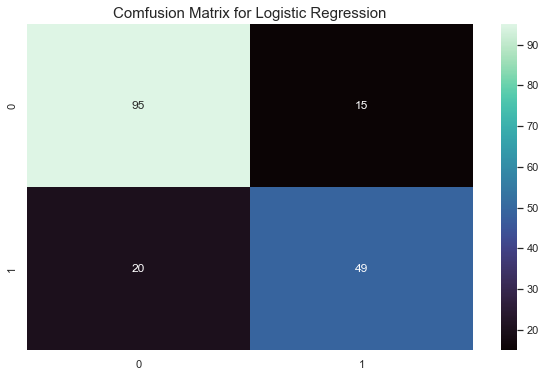

In [56]:
get_confussion_matrix(y_dev, y_pred_log)

plt.title("Comfusion Matrix for Logistic Regression", fontsize=15)
plt.show()

In [57]:
accuracy_logreg, recal_logreg, precision_logreg, fi_logreg = get_model_score_stats(y_dev, y_pred_log)
accuracy_logreg, recal_logreg, precision_logreg, fi_logreg

(0.8044692737430168, 0.7101449275362319, 0.765625, 0.736842105263158)

#### Knn

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train)

y_pred_knn = knn_clf.predict(X_dev_scaled)

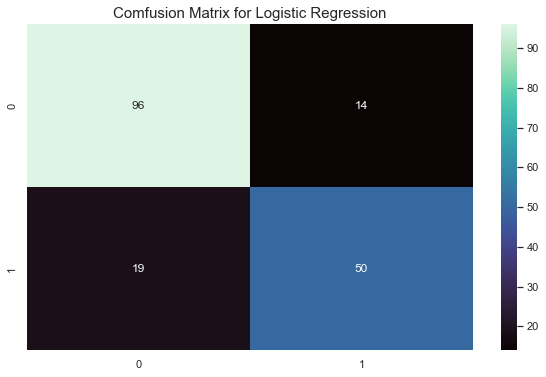

In [59]:
get_confussion_matrix(y_dev, y_pred_knn)

plt.title("Comfusion Matrix for Logistic Regression", fontsize=15)
plt.show()

In [60]:
accuracy_knn, recal_knn, precision_knn, fi_knn = get_model_score_stats(y_dev, y_pred_knn)
accuracy_knn, recal_knn, precision_knn, fi_knn

(0.8156424581005587, 0.7246376811594203, 0.78125, 0.7518796992481203)

#### SVM

In [61]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)

y_pred_svm = svm_clf.predict(X_dev_scaled)

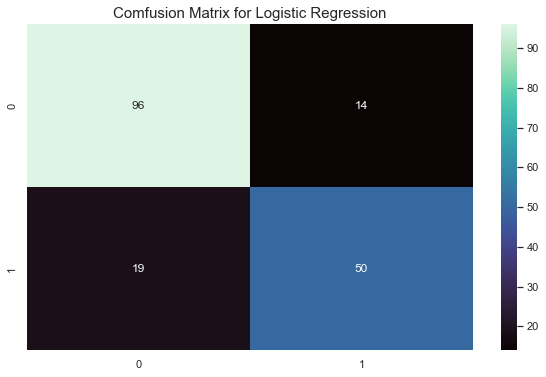

In [62]:
get_confussion_matrix(y_dev, y_pred_svm)

plt.title("Comfusion Matrix for Logistic Regression", fontsize=15)
plt.show()

In [63]:
accuracy_svm, recal_svm, precision_svm, fi_svm = get_model_score_stats(y_dev, y_pred_svm)
accuracy_svm, recal_svm, precision_svm, fi_svm

(0.8156424581005587, 0.7246376811594203, 0.78125, 0.7518796992481203)

#### Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

dcn_tree_clf = DecisionTreeClassifier(random_state=0)
dcn_tree_clf.fit(X_train_scaled, y_train)

y_pred_dcn_tree = dcn_tree_clf.predict(X_dev_scaled)

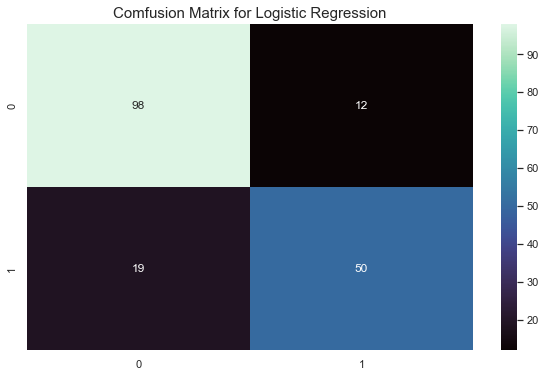

In [65]:
get_confussion_matrix(y_dev, y_pred_dcn_tree)

plt.title("Comfusion Matrix for Logistic Regression", fontsize=15)
plt.show()

In [66]:
accuracy_dtree, recal_dtree, precision_dtree, fi_dtree = get_model_score_stats(y_dev, y_pred_dcn_tree)
accuracy_dtree, recal_dtree, precision_dtree, fi_dtree

(0.8268156424581006,
 0.7246376811594203,
 0.8064516129032258,
 0.7633587786259542)

#### Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

rdm_fst_clf = RandomForestClassifier(random_state=0)
rdm_fst_clf.fit(X_train_scaled, y_train)

y_pred_rdm_fst = rdm_fst_clf.predict(X_dev_scaled)

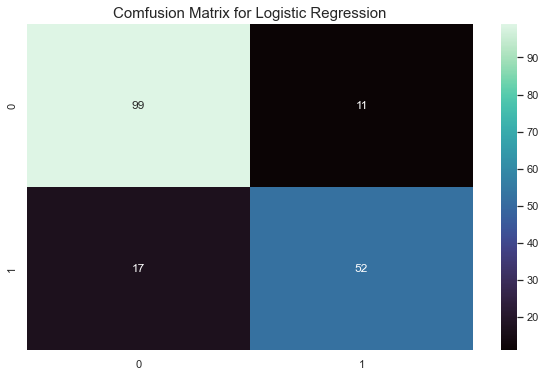

In [68]:
get_confussion_matrix(y_dev, y_pred_rdm_fst)

plt.title("Comfusion Matrix for Logistic Regression", fontsize=15)
plt.show()

In [69]:
accuracy_rforest, recal_rforest, precision_rforest, fi_rforest = get_model_score_stats(y_dev, y_pred_rdm_fst)
accuracy_rforest, recal_rforest, precision_rforest, fi_rforest

(0.8435754189944135, 0.7536231884057971, 0.8253968253968254, 0.787878787878788)

#### Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB

gsn_nb_clf = GaussianNB()
gsn_nb_clf.fit(X_train_scaled, y_train)

y_pred_gsn_nb = gsn_nb_clf.predict(X_dev_scaled)

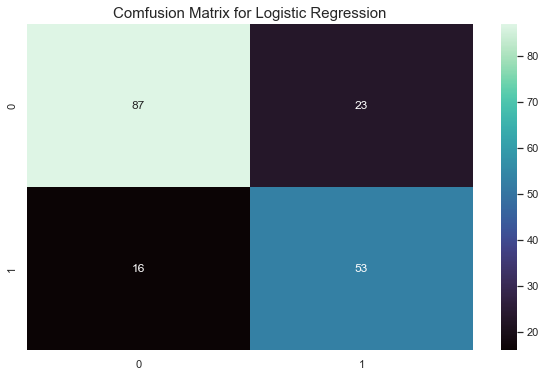

In [71]:
get_confussion_matrix(y_dev, y_pred_gsn_nb)

plt.title("Comfusion Matrix for Logistic Regression", fontsize=15)
plt.show()

In [72]:
accuracy_nb, recal_nb, precision_nb, fi_nb = get_model_score_stats(y_dev, y_pred_gsn_nb)

#### ANN

In [73]:
from sklearn.neural_network import MLPClassifier

ann_clf = MLPClassifier(solver='adam')
ann_clf.fit(X_train_scaled, y_train)

y_pred_ann = ann_clf.predict(X_dev_scaled)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


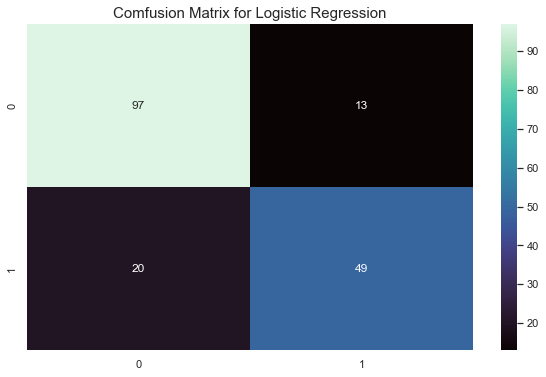

In [74]:
get_confussion_matrix(y_dev, y_pred_ann)

plt.title("Comfusion Matrix for Logistic Regression", fontsize=15)
plt.show()

In [75]:
get_model_score_stats(y_dev, y_pred_ann)

(0.8156424581005587,
 0.7101449275362319,
 0.7903225806451613,
 0.7480916030534351)

#### Model Comparision

In [76]:
model_comp_df = pd.DataFrame({
    "Model":            ["Log Reg", "KNN", "SVM", "Decision Tree", "Random Forest", "Naive Bayes"],
    "Accuracy Score":   [accuracy_logreg, accuracy_knn, accuracy_svm, accuracy_dtree, accuracy_rforest, accuracy_nb],
    "Recal":            [recal_logreg, recal_knn, recal_svm, recal_dtree, recal_rforest, recal_nb],
    "Precision":        [precision_logreg, precision_knn, precision_svm, precision_dtree, precision_rforest, precision_nb],
    "F1 Score":         [fi_logreg, fi_knn, fi_svm, fi_dtree, fi_rforest, fi_nb],
    
})

model_comp_df = model_comp_df.sort_values(by="Accuracy Score", ascending=False)
model_comp_df = model_comp_df.set_index("Model")
model_comp_df

,Accuracy Score,Recal,Precision,F1 Score
Model,,,,
Random Forest,0.843575,0.753623,0.825397,0.787879
Decision Tree,0.826816,0.724638,0.806452,0.763359
KNN,0.815642,0.724638,0.781250,0.751880
SVM,0.815642,0.724638,0.781250,0.751880
Log Reg,0.804469,0.710145,0.765625,0.736842
Naive Bayes,0.782123,0.768116,0.697368,0.731034


Text(0.5, 1.0, 'Model Comparison Table')

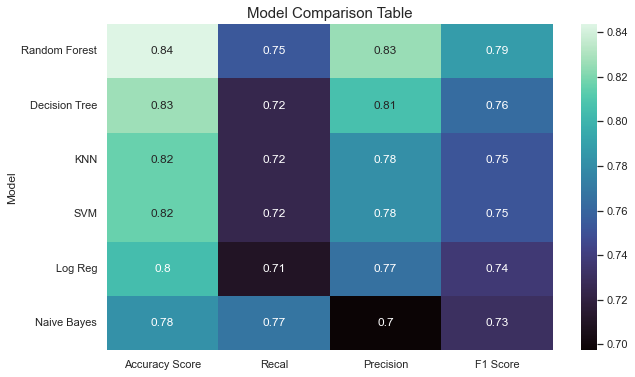

In [77]:
sns.heatmap(model_comp_df, annot=True, cmap="mako")
plt.title("Model Comparison Table", fontsize=15)

### Hyperparameter Tuning

In [78]:
from sklearn.model_selection import KFold, GridSearchCV

#### Logistic Regression

In [494]:
hyperpars_lr = {
    "max_iter":     [20, 50, 100, 150, 200, 500, 1000, 2000],
    "penalty":      ["l1", "l2", "elasticnet", "none"],
    "C":            [100, 10, 1.0, 0.1, 0.01],
    "class_weight": ["balanced", None],
    "solver":       ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],   
}

folds = KFold(n_splits=4, shuffle=True, random_state=1)
log_reg_clf_2 = LogisticRegression()

log_reg_grid_search = GridSearchCV(estimator=log_reg_clf_2, 
                                   param_grid=hyperpars_lr, 
                                   verbose=1, 
                                   cv=folds, 
                                   n_jobs=-1)

log_reg_grid_search.fit(X_train_scaled, y_train)


Fitting 4 folds for each of 1600 candidates, totalling 6400 fits


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/ho

GridSearchCV(cv=KFold(n_splits=4, random_state=1, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': ['balanced', None],
                         'max_iter': [20, 50, 100, 150, 200, 500, 1000, 2000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [495]:
best_score_lg = log_reg_grid_search.best_score_
best_hyperparams_lg = log_reg_grid_search.best_params_

best_hyperparams_lg, best_score_lg


({'C': 100,
  'class_weight': None,
  'max_iter': 20,
  'penalty': 'l1',
  'solver': 'liblinear'},
 0.8075842696629214)

In [496]:
log_reg_clf_2 = LogisticRegression(**best_hyperparams_lg)
log_reg_clf_2.fit(X_train_scaled, y_train)

y_pred_log_2 = log_reg_clf_2.predict(X_dev_scaled)

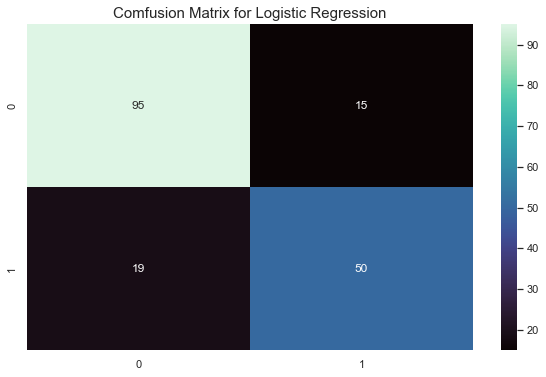

In [497]:
get_confussion_matrix(y_dev, y_pred_log_2)

plt.title("Comfusion Matrix for Logistic Regression", fontsize=15)
plt.show()

In [498]:
accuracy_logreg_2, recal_logreg_2, precision_logreg_2, fi_logreg_2 = get_model_score_stats(y_dev, y_pred_log_2)
accuracy_logreg_2, recal_logreg_2, precision_logreg_2, fi_logreg_2

(0.8100558659217877,
 0.7246376811594203,
 0.7692307692307693,
 0.7462686567164178)

#### KNN

In [499]:
hyperpars_knn = {
    "n_neighbors":  list(range(1, 30)),
    "leaf_size":    list(range(1, 35)),
    "p":            [1, 2],
    # "weights":      ["uniform", "distance"],   
    # "algorithm":    ["auto", "ball_tree", "kd_tree", "brute"],
}

folds = KFold(n_splits=4, shuffle=True, random_state=1)

knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(), 
                                   param_grid=hyperpars_knn, 
                                   verbose=1, 
                                   cv=folds, 
                                   n_jobs=-1)

knn_grid_search.fit(X_train_scaled, y_train)


Fitting 4 folds for each of 1972 candidates, totalling 7888 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=1, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]},
             verbose=1)

In [500]:
best_score_knn = knn_grid_search.best_score_
best_hyperparams_knn = knn_grid_search.best_params_

best_hyperparams_knn, best_score_knn


({'leaf_size': 1, 'n_neighbors': 21, 'p': 1}, 0.8132022471910112)

In [501]:
knn_clf_2 = KNeighborsClassifier(**best_hyperparams_knn)
knn_clf_2.fit(X_train_scaled, y_train)

y_pred_knn_2 = knn_clf_2.predict(X_dev_scaled)

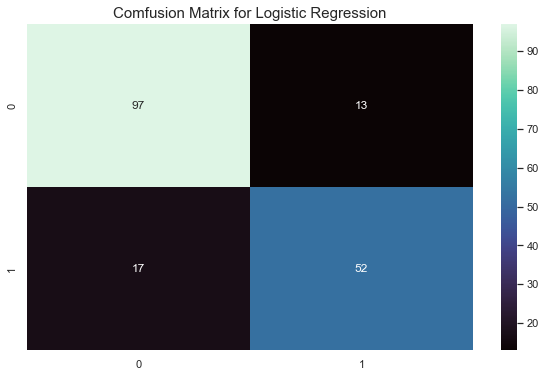

In [502]:
get_confussion_matrix(y_dev, y_pred_knn_2)

plt.title("Comfusion Matrix for Logistic Regression", fontsize=15)
plt.show()

In [88]:
accuracy_knn_2, recal_knn_2, precision_knn_2, fi_knn_2 = get_model_score_stats(y_dev, y_pred_knn_2)
accuracy_knn_2, recal_knn_2, precision_knn_2, fi_knn_2

(0.8324022346368715, 0.7536231884057971, 0.8, 0.7761194029850746)

#### SVM

In [ ]:
hyperpars_knn = {
    "n_neighbors":  list(range(1, 30)),
    "leaf_size":    list(range(1, 35)),
    "p":            [1, 2],
    # "weights":      ["uniform", "distance"],   
    # "algorithm":    ["auto", "ball_tree", "kd_tree", "brute"],
}

folds = KFold(n_splits=4, shuffle=True, random_state=1)

knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(), 
                                   param_grid=hyperpars_knn, 
                                   verbose=1, 
                                   cv=folds, 
                                   n_jobs=-1)

knn_grid_search.fit(X_train_scaled, y_train)


Fitting 4 folds for each of 1972 candidates, totalling 7888 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=1, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]},
             verbose=1)

In [ ]:
best_score_knn = knn_grid_search.best_score_
best_hyperparams_knn = knn_grid_search.best_params_

best_hyperparams_knn, best_score_knn


({'leaf_size': 1, 'n_neighbors': 21, 'p': 1}, 0.8132022471910112)

In [ ]:
knn_clf_2 = KNeighborsClassifier(**best_hyperparams_knn)
knn_clf_2.fit(X_train_scaled, y_train)

y_pred_knn_2 = knn_clf_2.predict(X_dev_scaled)

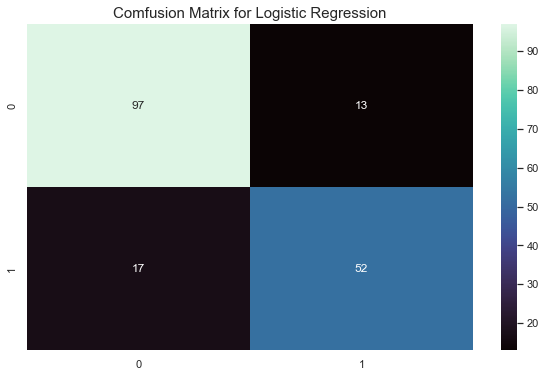

In [ ]:
get_confussion_matrix(y_dev, y_pred_knn_2)

plt.title("Comfusion Matrix for Logistic Regression", fontsize=15)
plt.show()

In [ ]:
accuracy_knn_2, recal_knn_2, precision_knn_2, fi_knn_2 = get_model_score_stats(y_dev, y_pred_knn_2)
accuracy_knn_2, recal_knn_2, precision_knn_2, fi_knn_2

(0.8324022346368715, 0.7536231884057971, 0.8, 0.7761194029850746)